In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from scipy.integrate import odeint, ode
from sdeint import itoint

from pacological.chance_zandt import cz, phi
from pacological.util import phi as phi_i
from convenience.numpy import save_hdfz, load_hdfz

from fakespikes.rates import stim
from pacological.util import create_I, ornstein_uhlenbeck

In [7]:
%run ../chance_zandt.py

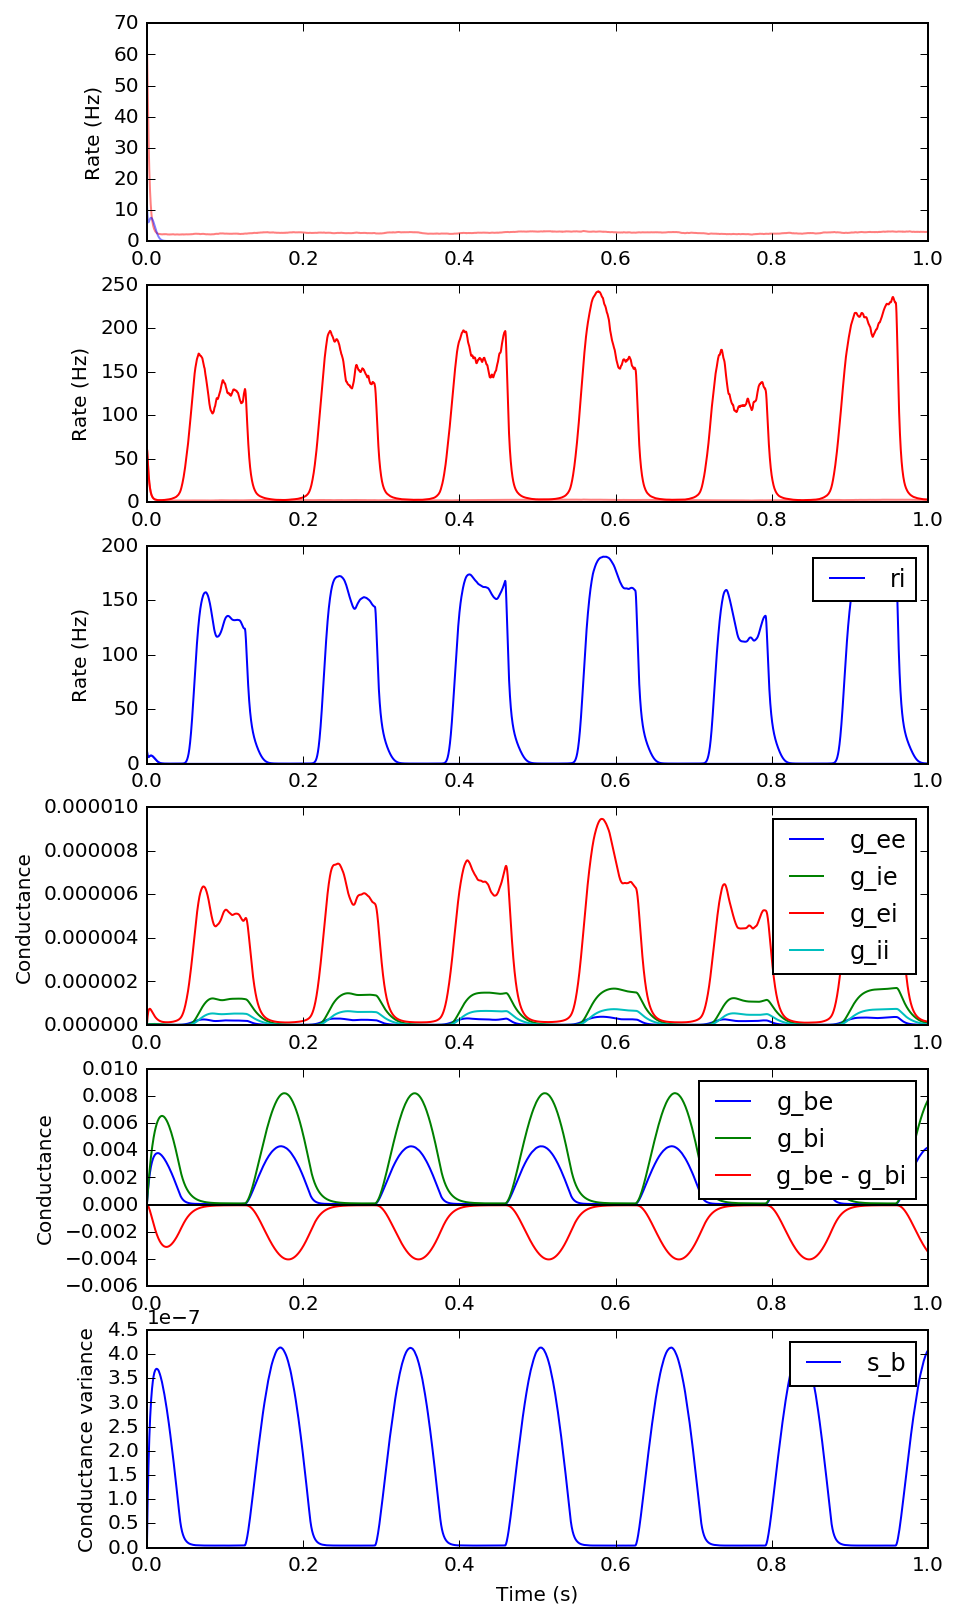

In [8]:
# --
plt.figure(figsize=(7, 16))
nplot = 7

n = 1
# plt.subplot(nplot, 1, n)
# stim = np.mean(ys[:, 1]) * np.asarray([Istim(t) for t in times])
# plt.plot(times, stim, label='Stimulus', color='k')
# plt.ylabel("Stimulus drive (mV)")

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys_base[:, 0], color='red', alpha=0.5)
plt.plot(times, ys_base[:, 1], color='blue', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 0], color='red')
plt.plot(times, ys_base[:, 0], color='red', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 1], label='ri', color='blue')
plt.plot(times, ys_base[:, 1], color='blue', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 2], label='g_ee')
plt.plot(times, ys[:, 3], label='g_ie')
plt.plot(times, ys[:, 4], label='g_ei')
plt.plot(times, ys[:, 5], label='g_ii')
plt.xlim(0, tmax)
plt.ylabel("Conductance")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 6], label='g_be')
plt.plot(times, ys[:, 7], label='g_bi')
plt.plot(times, ys[:, 6] - ys[:, 7], label='g_be - g_bi')
plt.xlim(0, tmax)
plt.axhline(0, color='k')
plt.ylabel("Conductance")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
Sb = ys[:, 8] + ys[:, 9]
plt.plot(times, Sb, label='s_b')
plt.xlim(0, tmax)
plt.axhline(0, color='k')
plt.ylabel("Conductance variance")
plt.legend()

plt.xlabel("Time (s)")

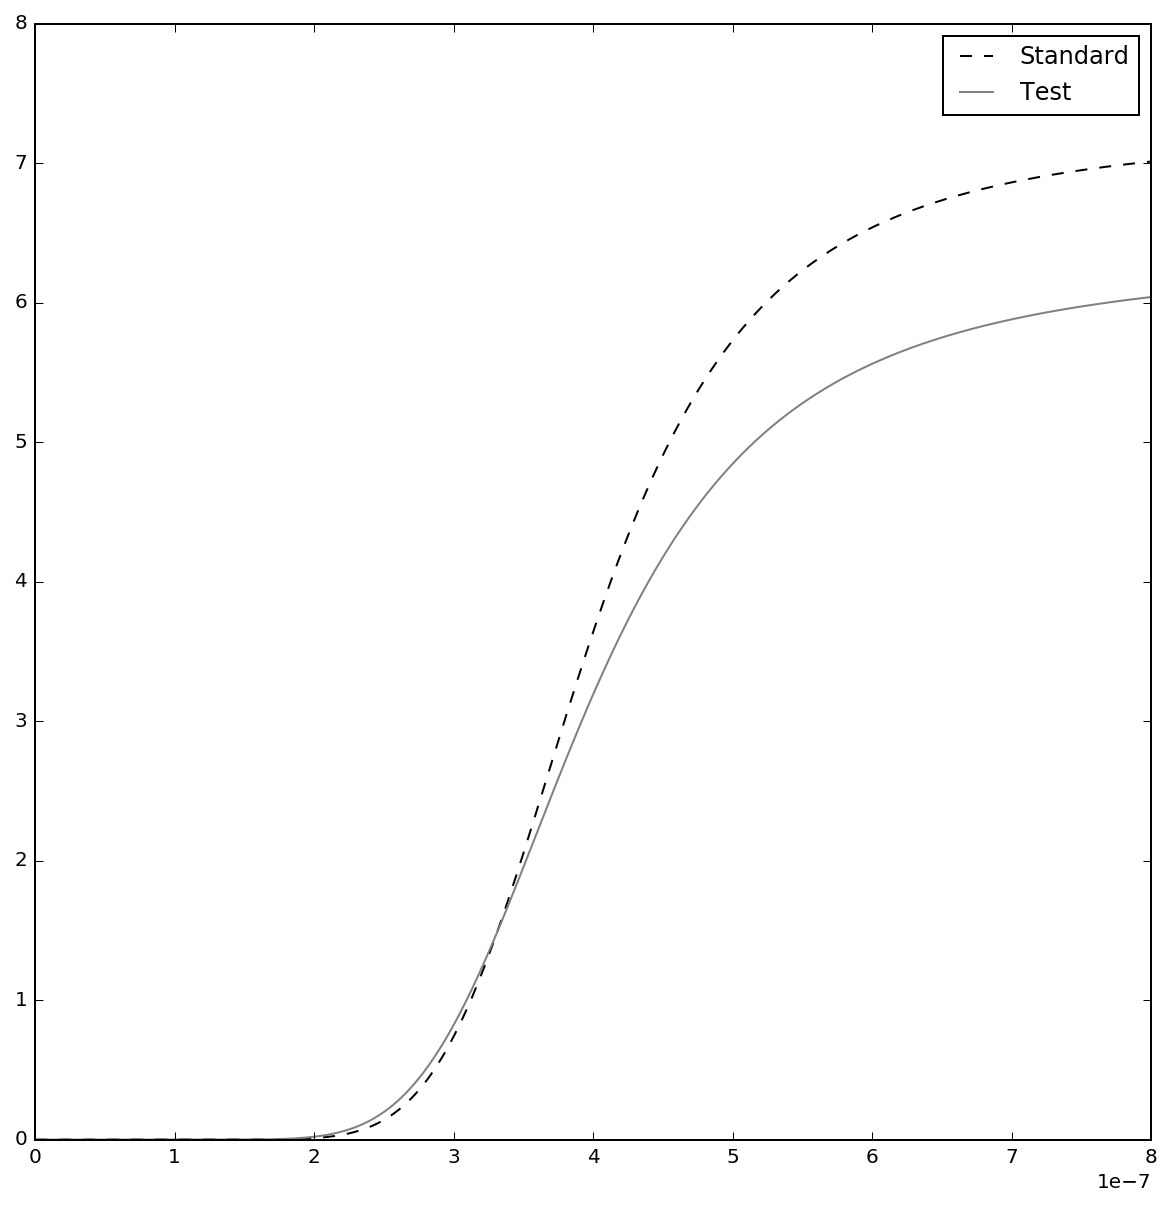

In [4]:
Is = np.linspace(0, 2 * d, 2000) 

Ce = 32; Ci = 8
g0 = np.abs(np.mean([Ce * w_be, Ci * w_bi]) / 0.04)
gb = np.mean([ys[:, 6].mean(), ys[:, 7].mean()]) 

plt.figure(figsize=(10, 10))
plt.plot(Is, phi(Is, d, g0, gb, np.sqrt(np.mean(Sb))), color='k', label="Standard", linestyle='--')
plt.plot(Is, phi(Is, d, g0, gb, np.sqrt(1.3* (np.mean(Sb)))), color='grey', label="Test")
plt.legend()

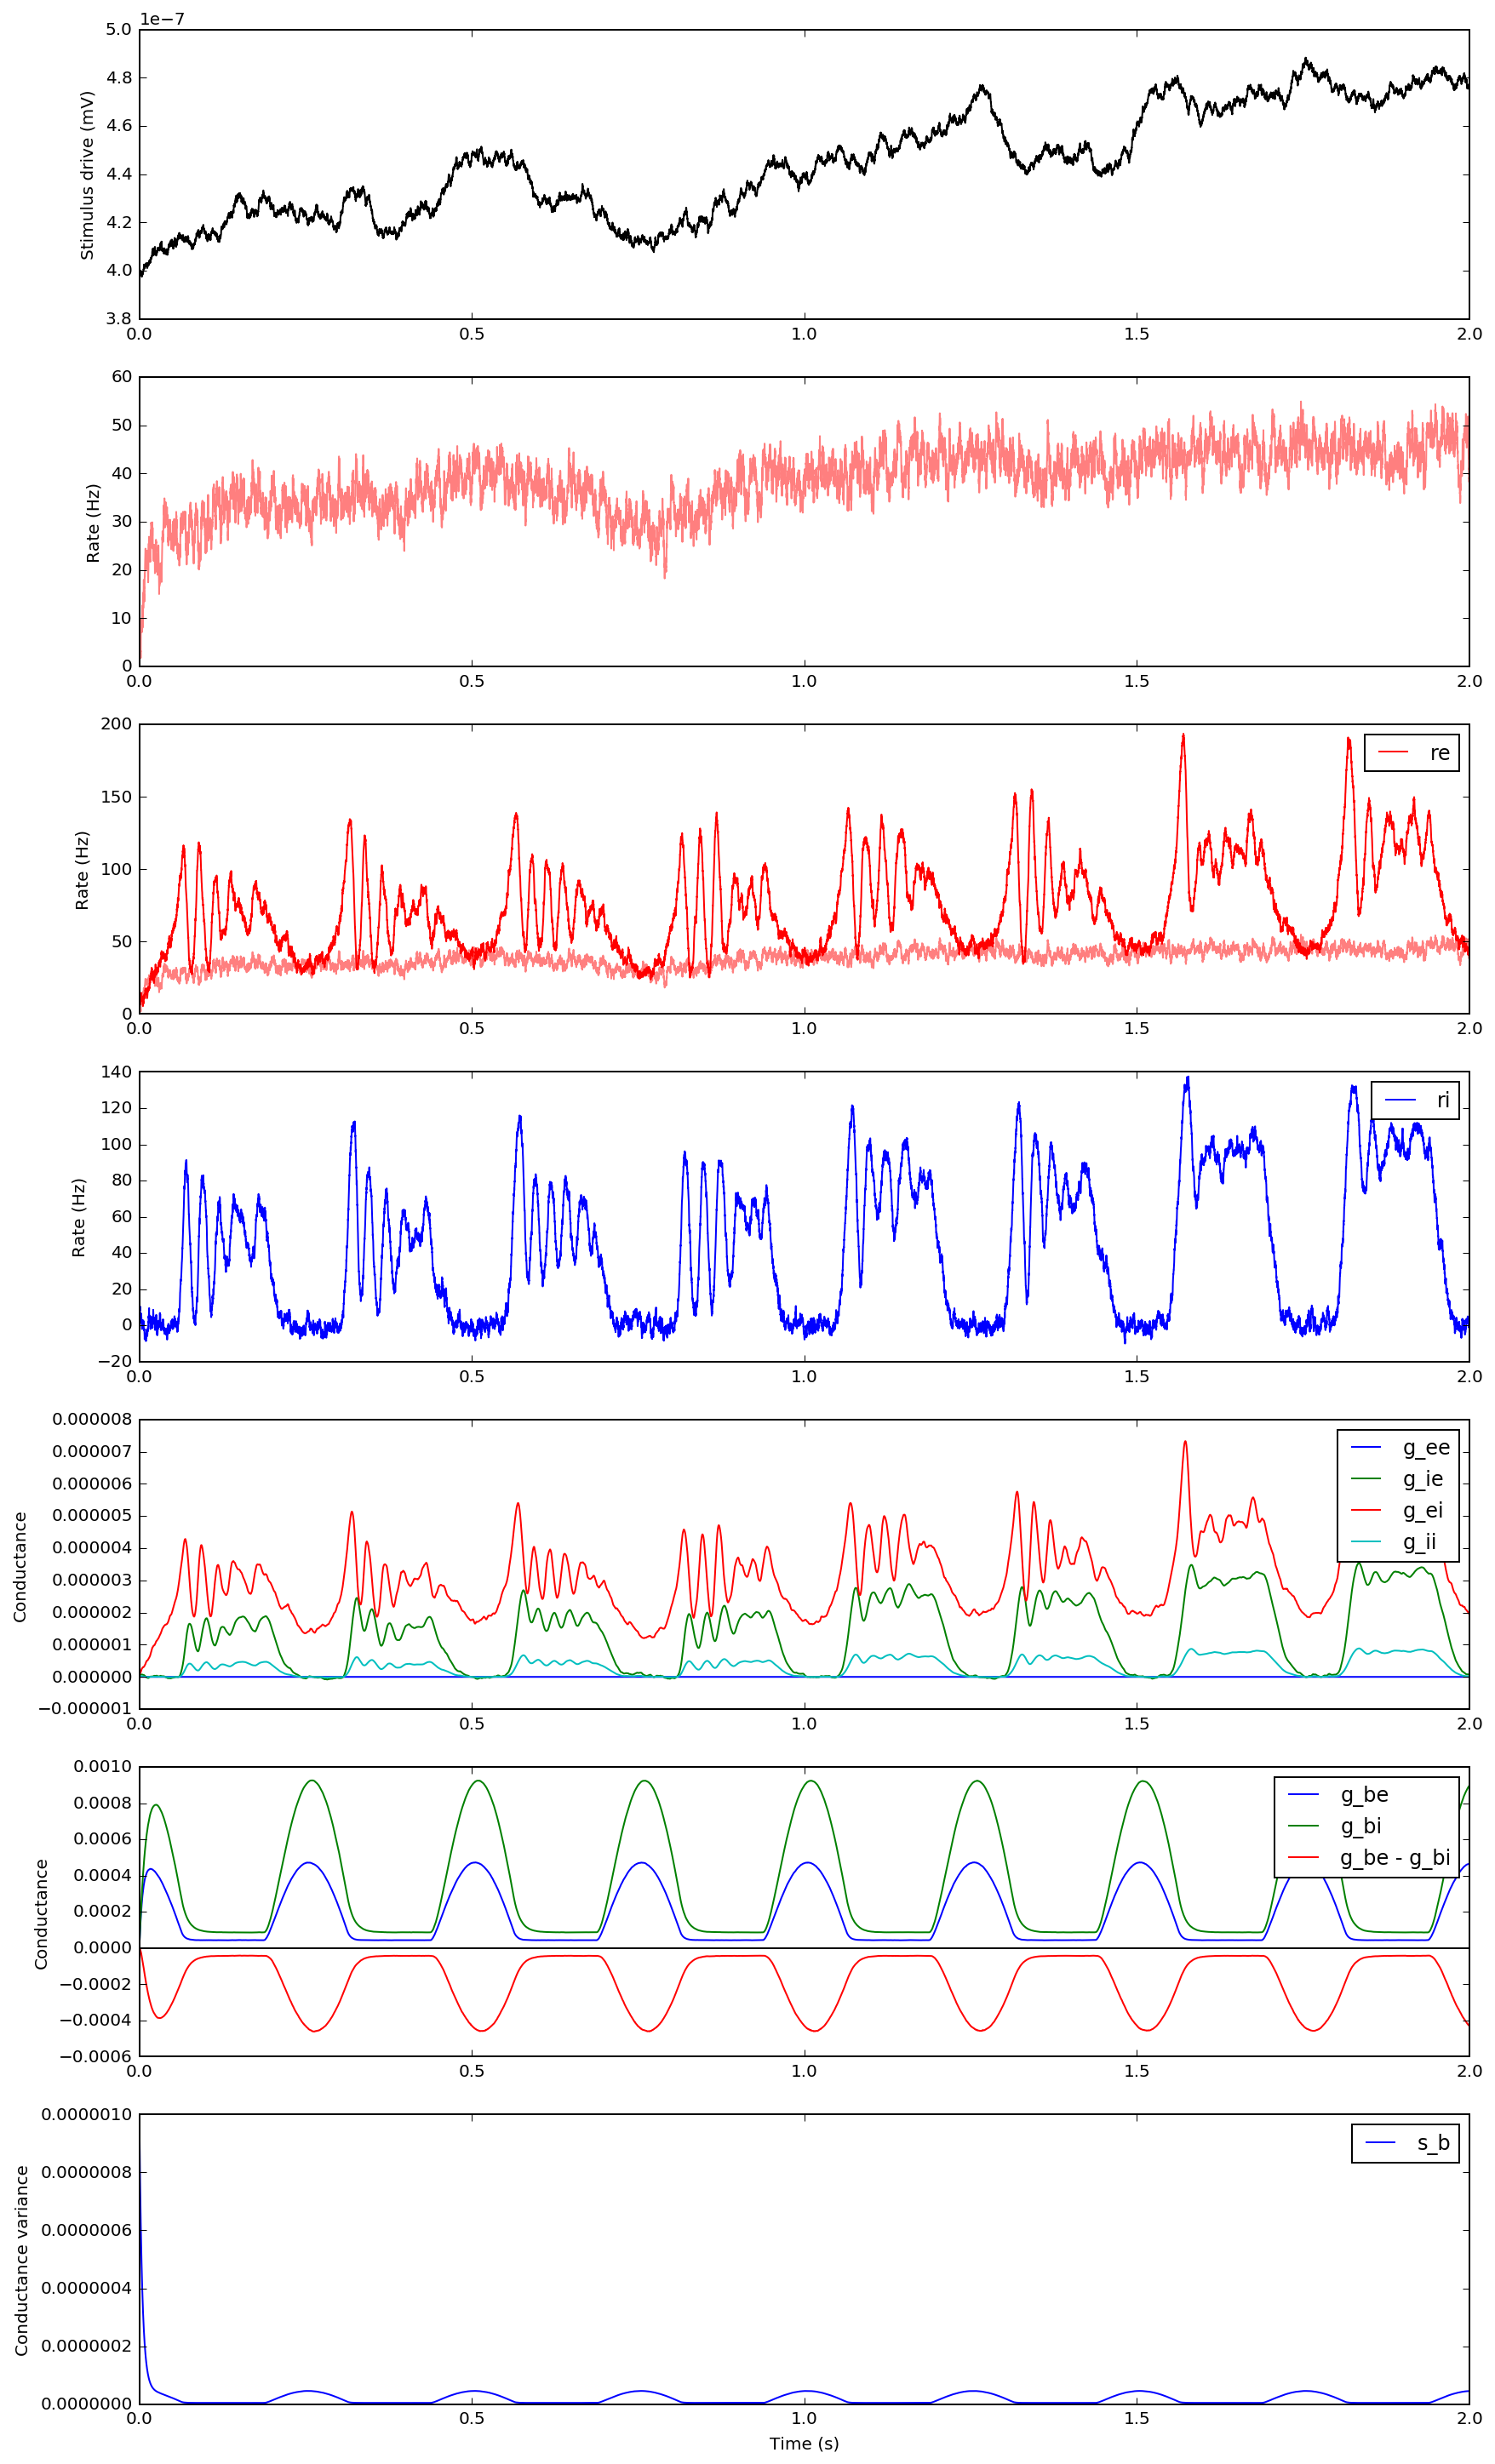

In [5]:
# Plot results
# code = 61 # Nice weak gamma burst at onset, the decays to stim, no w_ii. Still + MI
# code = 81 # w_ei dom - no gamma
# code = 69 # same as 63, but with w_ii = 0.4 - same pattern as 69
code = 49 # async
# code = 67 # 40 Hz
code = 103 # 40 Hz

tmax = 2
path = "/home/ejp/src/pacological/data/exp300/data_{0}.npz".format(code)
with np.load(path) as data:
    ys_base = data['ys_base']
    ys = data['ys']
    times = data['times']
    stim = data['stim']

# --
plt.figure(figsize=(14, 25))
nplot = 7

n = 1
plt.subplot(nplot, 1, n)
plt.plot(times, stim, label='Stimulus', color='k')
plt.ylabel("Stimulus drive (mV)")

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys_base[:, 0], color='red', alpha=0.5)
# plt.plot(times, ys_?base[:, 1], color='blue', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 0], label='re', color='red')
plt.plot(times, ys_base[:, 0], color='red', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 1], label='ri', color='blue')
# plt.plot(times, ys_base[:, 1], color='blue', alpha=0.5)
plt.xlim(0, tmax)
plt.ylabel("Rate (Hz)")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 2], label='g_ee')
plt.plot(times, ys[:, 3], label='g_ie')
plt.plot(times, ys[:, 4], label='g_ei')
plt.plot(times, ys[:, 5], label='g_ii')
plt.xlim(0, tmax)
plt.ylabel("Conductance")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
plt.plot(times, ys[:, 6], label='g_be')
plt.plot(times, ys[:, 7], label='g_bi')
plt.plot(times, ys[:, 6] - ys[:, 7], label='g_be - g_bi')
plt.xlim(0, tmax)
plt.axhline(0, color='k')
plt.ylabel("Conductance")
plt.legend()

n += 1
plt.subplot(nplot, 1, n)
Sb = ys[:, 8] + ys[:, 9]
plt.plot(times, Sb, label='s_b')
plt.xlim(0, tmax)
plt.axhline(0, color='k')
plt.ylabel("Conductance variance")
plt.legend()

plt.xlabel("Time (s)")